비지도학습 - 군집화 (KMeans)

In [7]:
# KMeans

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [8]:
# 데이터 생성
# make_blobs : 군집화에 필요한 데이터 생성
n_sample = 300
n_cluster = 3

In [9]:
x, y = make_blobs(n_samples=n_sample, centers= n_cluster, random_state=42, cluster_std=1.0)

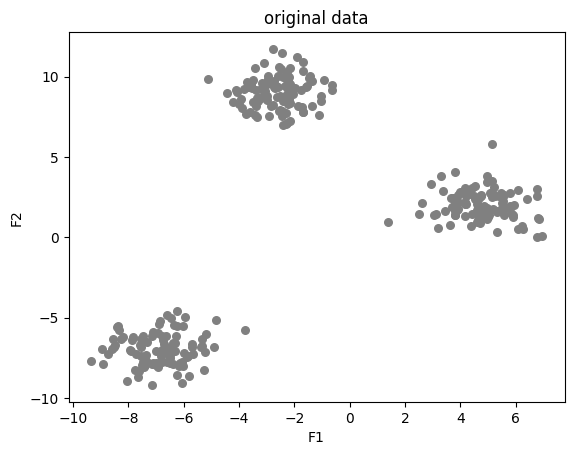

In [8]:
# 데이터 그래프 생성 : 군집화 하기 전, 중앙값 구하기 전
plt.scatter(x[:, 0], x[:, 1], s=30, c='gray', label='original data')
plt.title('original data')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

In [65]:
# Kmeans 객체생성 학습
kmeans = KMeans(n_clusters=3, random_state=42)

In [66]:
# 레이블 값 반환
cluster_labels = kmeans.fit_predict(x)

Text(0, 0.5, 'F2')

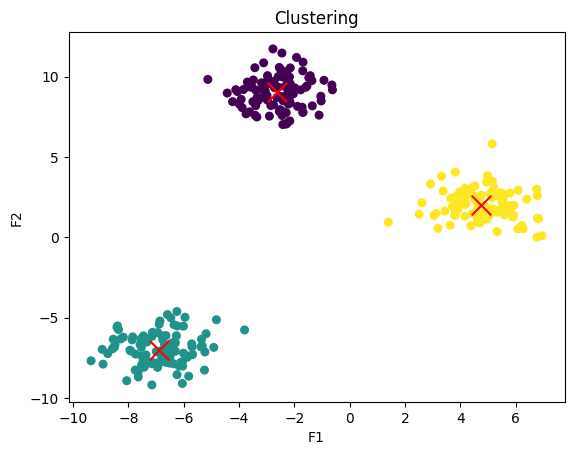

In [67]:
# 군집 결과 시각화
plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Clustering')
plt.xlabel('F1')
plt.ylabel('F2')

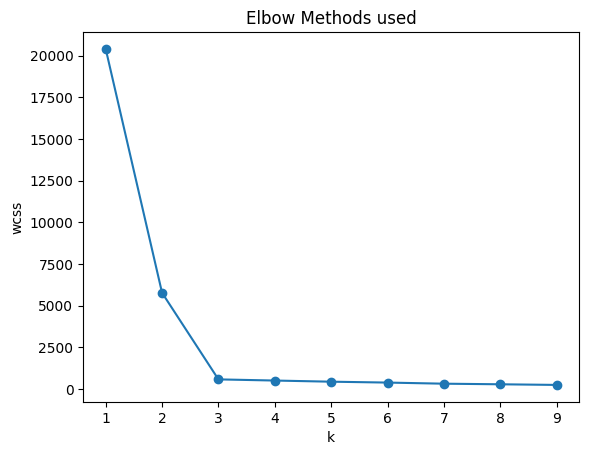

In [68]:
wcss = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit_predict(x)
    wcss.append(kmeans_temp.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Methods used')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [69]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [70]:
# 실루엣 스코어
sil_avg = silhouette_score(x, cluster_labels)
print(sil_avg)

0.8480303059596955


In [71]:
# 시각화를 위한 점수계산
sil_values = silhouette_samples(x, cluster_labels)

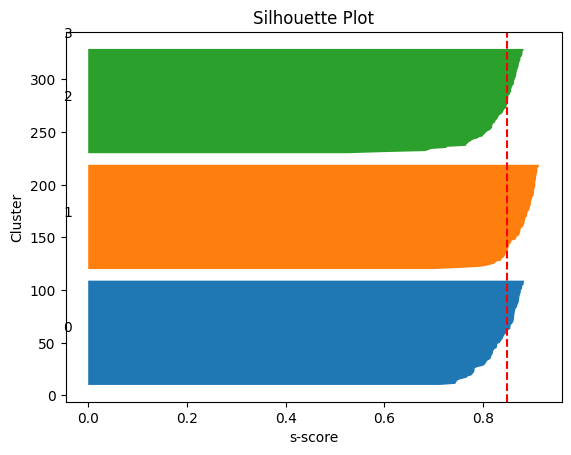

In [72]:
y_lower = 10
for i in range(4) :
    ith_cluster_sil_val = sil_values[cluster_labels == i]
    ith_cluster_sil_val.sort()
    size_cluster_i = ith_cluster_sil_val.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_val)
    plt.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('s-score')
plt.ylabel('Cluster')
plt.show()

In [74]:
# 필요한 라이브러리 임포트
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

In [75]:
# 1. 데이터 생성
# -군집화 실험에 적합한 샘플 데이터를 생성합니다.
 # -make_blobs: 클러스터가 명확히 구분되는 데이터셋 생성
data, _=make_blobs(n_samples=200, centers=4, cluster_std=0.7, 
random_state=42)

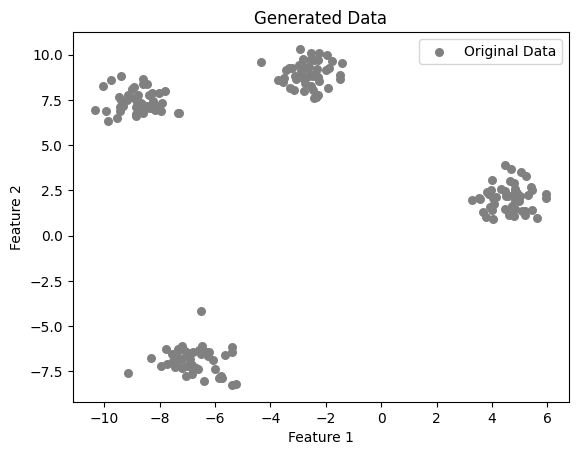

In [76]:
 # 데이터 시각화 (원본 데이터)
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="Original Data")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [77]:
# 2. 계층적 군집화 적용
# -linkage 함수를 사용하여 클러스터 간의 거리 계산
# -method='ward': Ward's method로 데이터 간 거리 기반 병합
linked=linkage(data, method='ward')

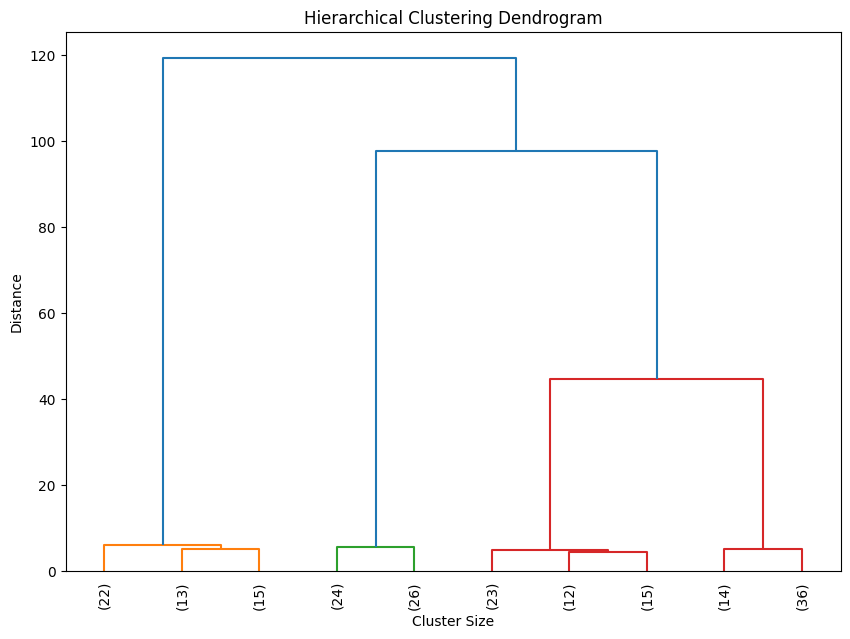

In [78]:
# 3. 덴드로그램 시각화
# -linkage 결과를 기반으로 덴드로그램을 생성합니다.
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=10, leaf_rotation=90, 
leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

In [80]:
# 4. 클러스터 형성
# -fcluster: 덴드로그램의 특정 거리 기준으로 클러스터를 형성
# -t=7: 클러스터를 나누는 임계값 (거리 기준)
cluster_labels=fcluster(linked, t=7, criterion='distance')

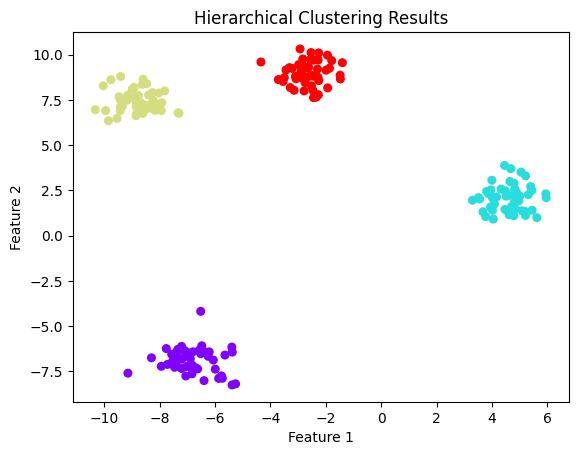

In [82]:
# 5. 결과 시각화
# -각 클러스터를 색상으로 구분하여 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='rainbow', s=30)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [2]:
 # 1. 데이터 생성
# -make_moons: 비구형(non-linear) 데이터 구조를 가진 샘플 데이터를 생성
# -noise=0.05: 데이터에 노이즈 추가
data, _=make_moons(n_samples=300, noise=0.05, random_state=42)

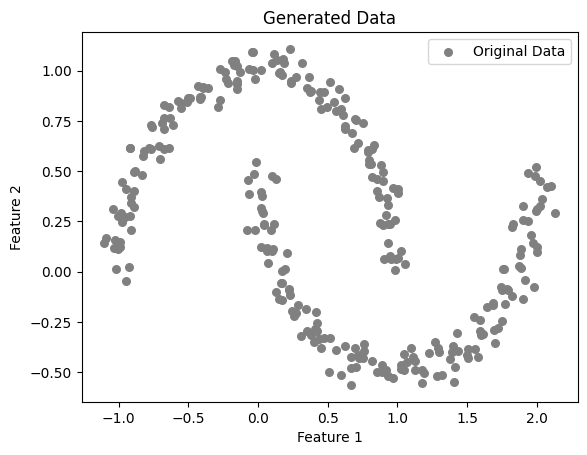

In [86]:
# 데이터 시각화
plt.scatter(data[:, 0], data[:, 1], s=30, color='gray', label="Original Data")
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [87]:
 # 2. DBSCAN 모델 생성 및 학습
# -eps: 포인트 간 거리가 이 값 이하일 때 이웃으로 간주 (밀도의 기준)
 # -min_samples: 핵심 포인트가 되기 위한 최소 이웃 데이터 수
dbscan=DBSCAN(eps=0.2, min_samples=5)

In [88]:
cluster_labels = dbscan.fit_predict(data)

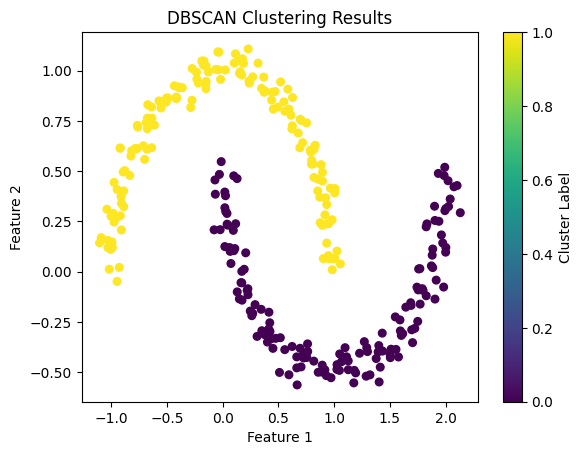

In [90]:
# 3. 클러스터링 결과 분석
# 클러스터링 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [92]:
 # 4. 클러스터링 결과 요약
# -클러스터 레이블: 클러스터 번호 (노이즈는 -1로 표시)
unique_labels=set(cluster_labels)
print(f"UniqueClusters: {unique_labels}")

UniqueClusters: {np.int64(0), np.int64(1)}
